# 标准流程
## 随机森林 超参调参
This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. 

### 加载样本集

In [9]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10,True)
X_train, X_val, y_train, y_val = train_test_split(X, y)
print(X_train.shape)
print(X_val.shape)

(1347, 64)
(450, 64)


### 训练模型

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [11]:
rf = RandomForestClassifier(n_estimators=300, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=300, n_jobs=-1)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [12]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [13]:
predictions = np.vstack(predictions)
predictions.shape

(300, 450, 10)

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [14]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
cum_mean.shape

(300, 450, 10)

**Step 5:** Get accuracy scores for each `n_estimators` value

In [19]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

### 学习算法超参优化

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

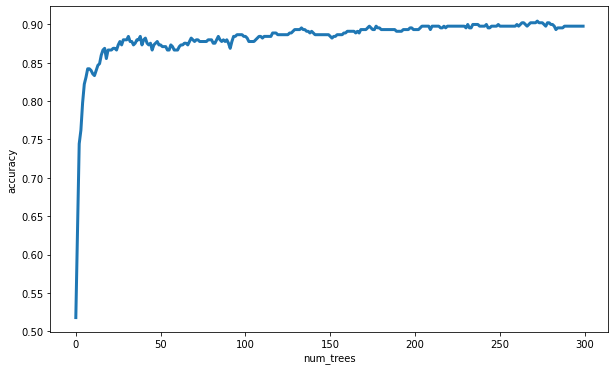

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');